In [4]:
Dataset description
Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
Age(age) -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

SyntaxError: invalid syntax (<ipython-input-4-b68316563b63>, line 1)

In [5]:
Steps:
Import the libs
First look at the data
Exploratory data analysis
3.1. IQR and ouliers analysis (box plot)
3.2. Distribution of independent variables
3.3. Pair plots
Heat map analysis
K-Means clustering - deal with multiple gaussians
Model building - Iteration 1 --> Use data as is
Model building - Iteration 2 --> Include the results of outlier treatment
Model building - Iteration 3 --> Include the results of K-means clustering
Model building - Iteration 4 --> Normalize/Standardize the data before model building
Hyper parameter training on best model from all iterations



SyntaxError: invalid syntax (<ipython-input-5-8ca391001362>, line 1)

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/compressive-strength-of-concrete'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../input/compressive-strength-of-concrete/npvproject-concrete.csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading Data

In [10]:
data = pd.read_csv("../input/compressive-strength-of-concrete/npvproject-concrete.csv")

In [11]:
len(data)

1030

Simplifying Column names, since they appear to be too lengthy.

In [12]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

##### Checking for 'null' values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
BlastFurnaceSlag    1030 non-null float64
FlyAsh              1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CoarseAggregate     1030 non-null float64
FineAggregare       1030 non-null float64
Age                 1030 non-null int64
CC_Strength         1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregare,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CC_Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [16]:
Observations:
All of the data in the dataset is numerical
No null/NAN data
Age data appears to have outliers because max value is very large as 
compared to 3rd IQR value

SyntaxError: invalid syntax (<ipython-input-16-3b791b3d2edb>, line 1)

There are no null values in the data.

##### Checking the pairwise relations of Features.

In [ ]:
Exploratory data analysis
Box plots

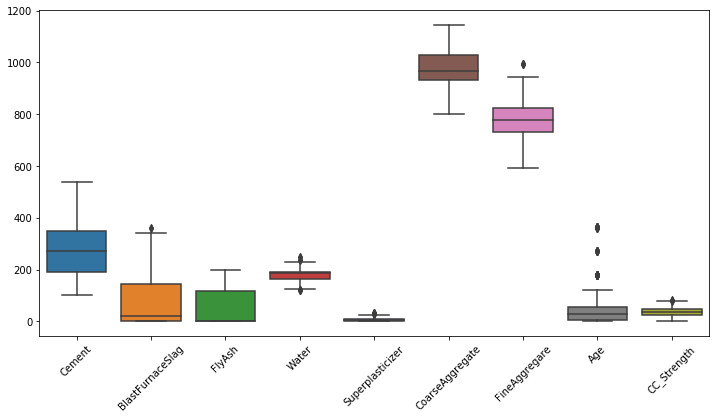

In [18]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [19]:
Observations
Age column appears to be having maximum number of outliers
Slag, Water, superplastic, fineagg features have some outliers
All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale
the data so as to avoid bias in algorithms

SyntaxError: invalid syntax (<ipython-input-19-3e118c3bca70>, line 2)

In [ ]:
> ## Distribution of independent variables


ValueError: num must be 1 <= num <= 8, not 9

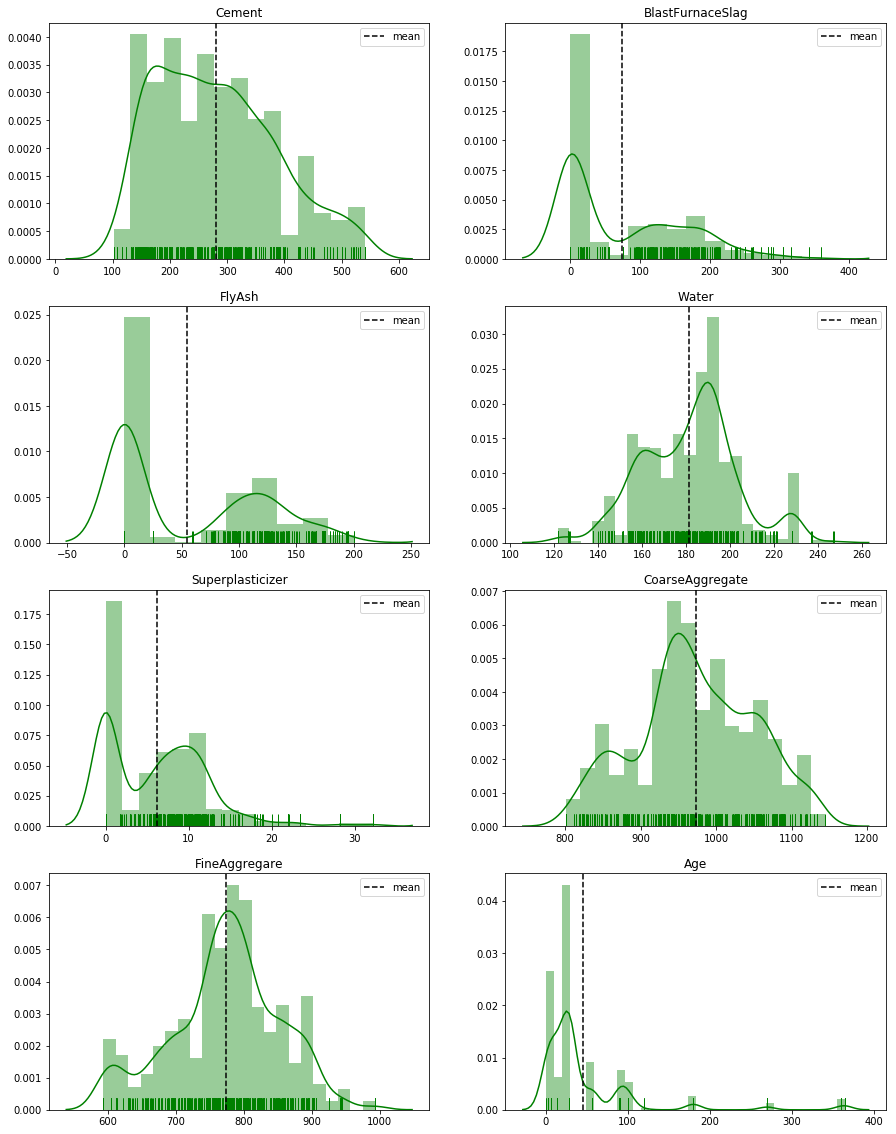

In [20]:
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

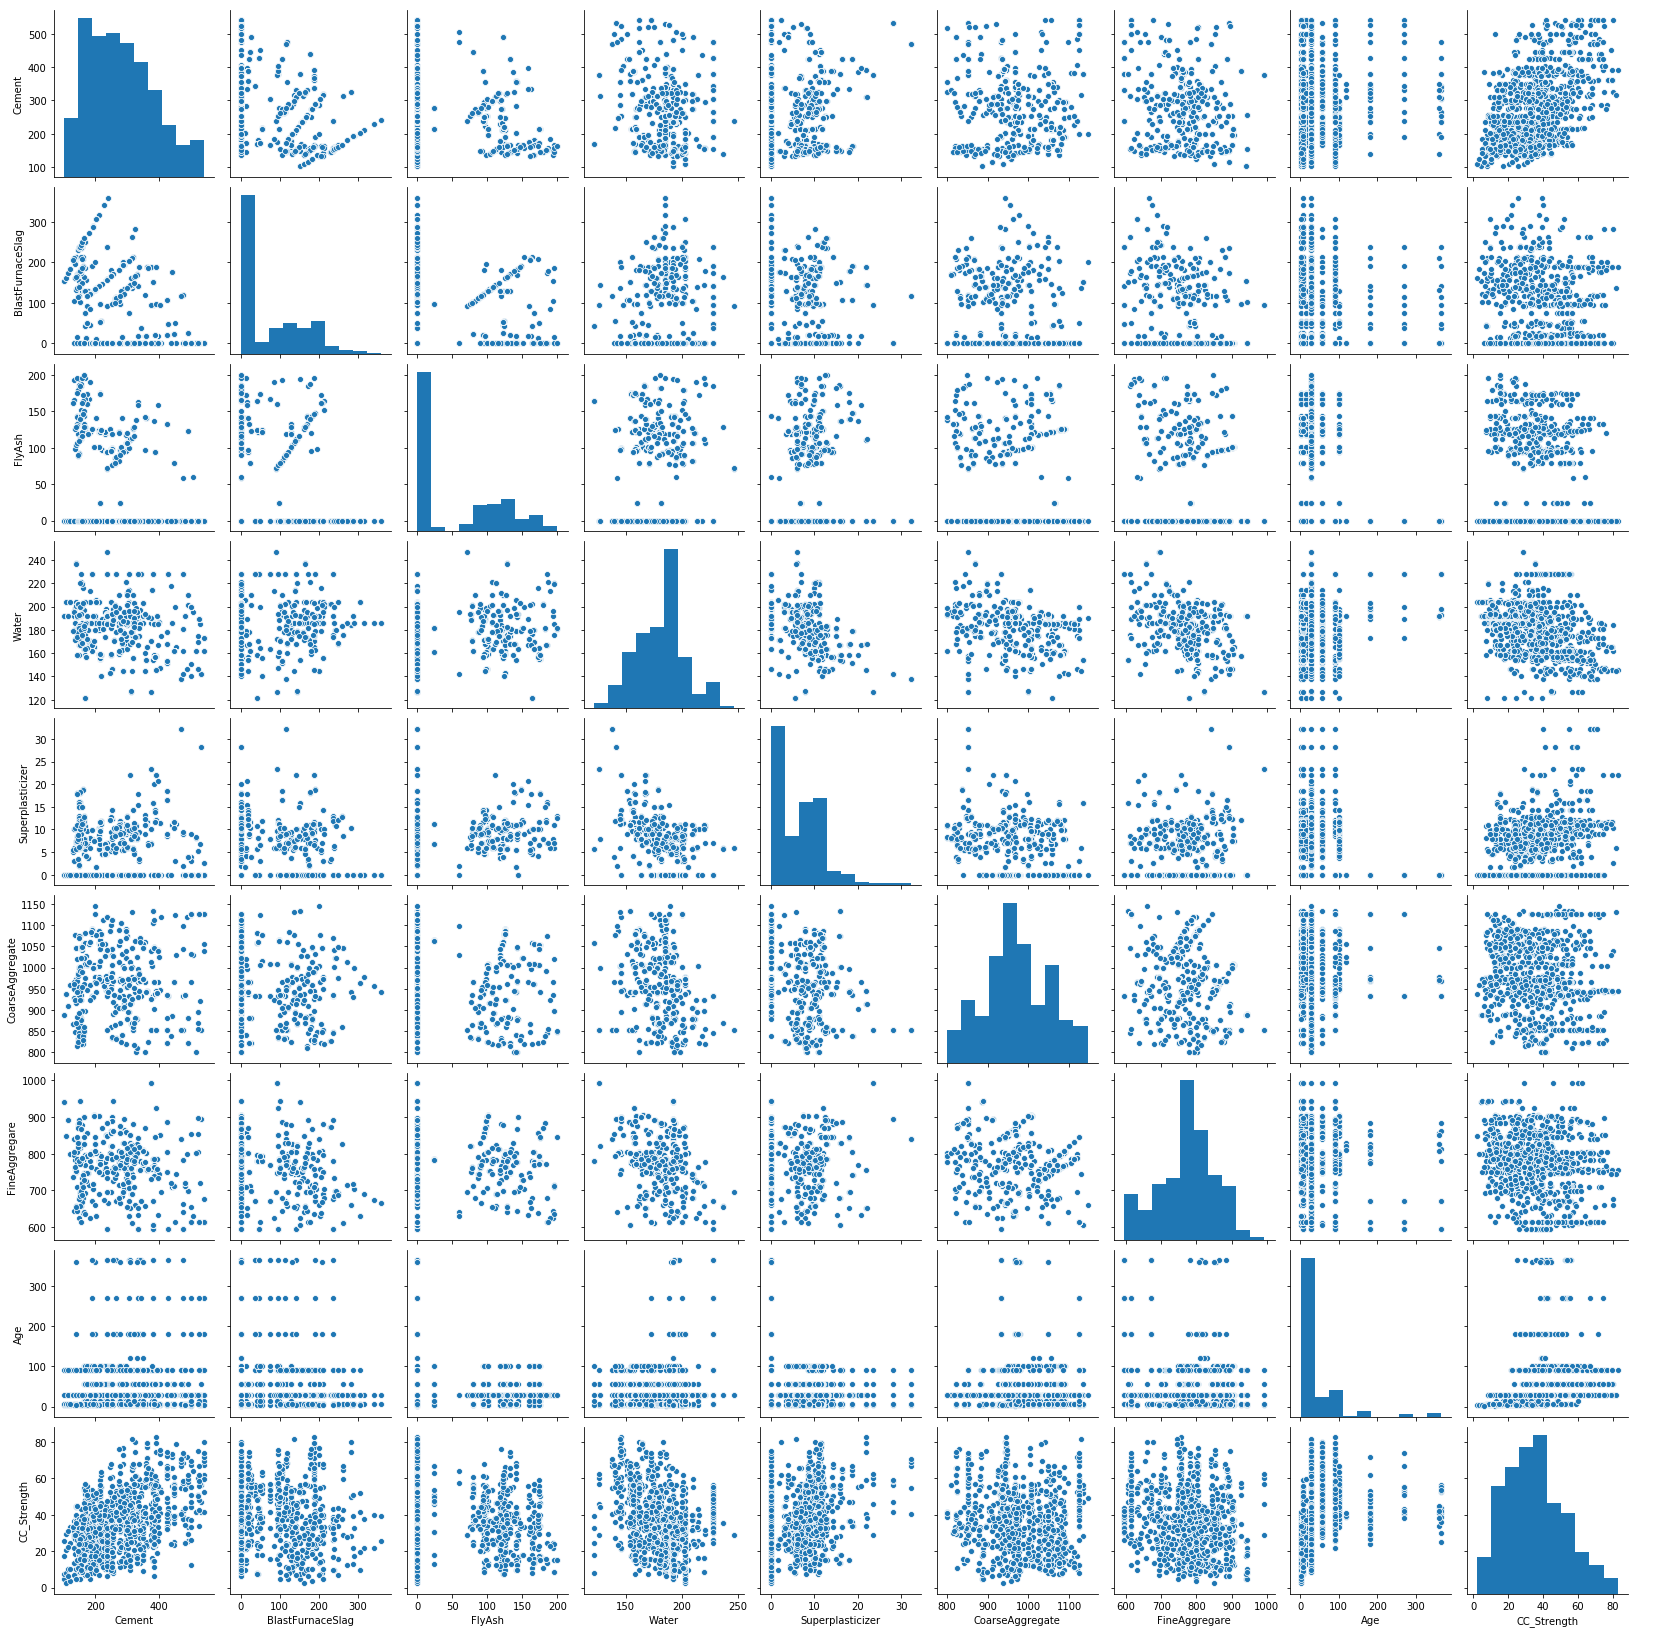

In [21]:
sns.pairplot(data)
plt.show()

In [ ]:
Observations
Diagonal analysis + dist plots analysis
Distribution of cement appears nearly normal
Slag and ash has 2 gaussians and is skewed
Water and Superplastic have near normal distributions
Age data has long tail which confirms the presence of outliers
Strength is normally distributed
Off-diagonal analysis with strength
Cement has strong correlation with strength
Slag is a very weak predictor because the distribution is like a cloud
ash, coarseagg and fineagg are also weak predictors
Water appears to have a negative correlation with strength
Superplastic appears to have positive correlation with strength
age also has strong correlation with strength
Off-diagonal analysis between other features
Cement and slag have strong correlation
Water and super plastic have strong negative correlation

There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the Pearson Correlation coefficients between the features.

In [ ]:
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
3D graph between 3 most important features and target

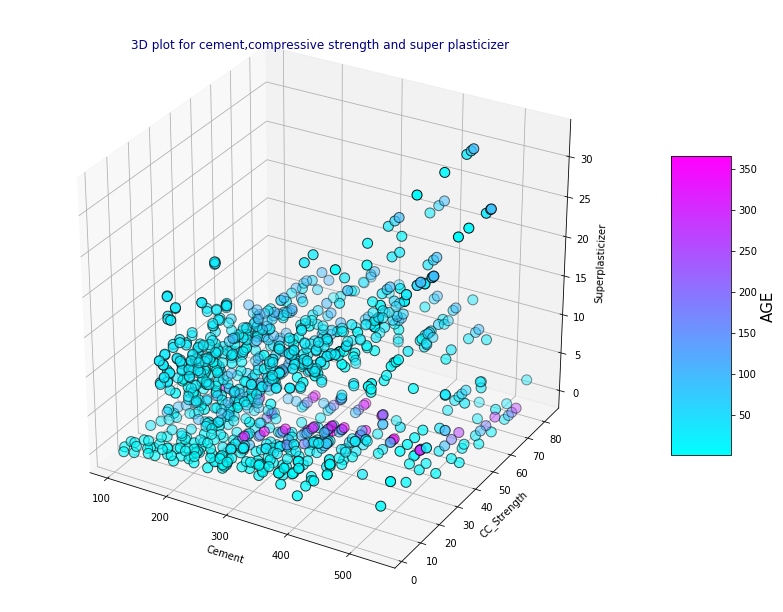

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["Cement"],
           data["CC_Strength"],
           data["Superplasticizer"],
           linewidth=1,edgecolor ="k",
           c=data["Age"],s=100,cmap="cool")

ax.set_xlabel("Cement")
ax.set_ylabel("CC_Strength")
ax.set_zlabel("Superplasticizer")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

In [ ]:
EDA

Text(0.5, 1.0, 'Compressive Strength Distribution')

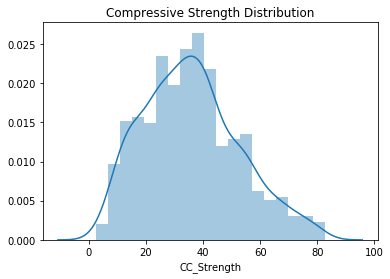

In [23]:
ax = sns.distplot(data.CC_Strength)
ax.set_title("Compressive Strength Distribution")

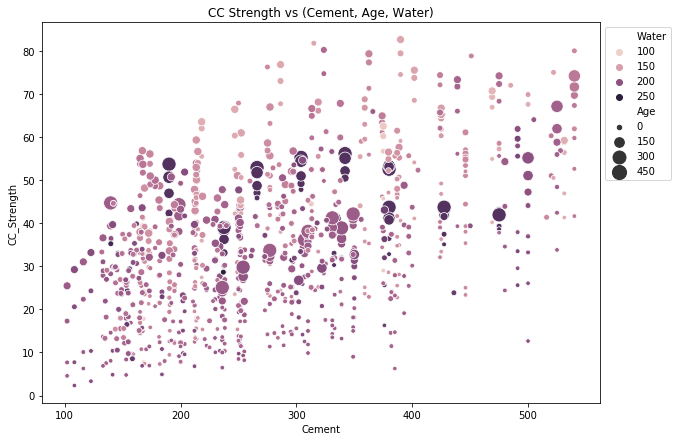

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Conclusions from Strength vs (Cement, Age, Water)
* Compressive strength increases with amount of cement
* Compressive strength increases with age
* Cement with low age requires more cement for higher strength
* The older the cement is the more water it requires
* Concrete strength increases when less water is used in preparing it


### Data Preprocessing
Separating Input Features and Target Variable.

In [25]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

#### Splitting data into Training and Test splits

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Scaling
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Building
Training Machine Learning Algorithms on the training data and making predictions on Test data.

#### 1. Linear Regression
* The Go-to method for Regression problems.
* The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.
* The objective function used in this case is Mean Squared Error.
* There are three versions of Linear Regression
    - Linear Regression - No regularisation
    - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
    - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)
comparing these three algorithms

In [29]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

#### Evaluation
Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57
LassoRegression 	 10.68 		 114.11 	8.65 		0.54
RidgeRegression 	 10.29 		 105.84 	8.24 		0.57


The performance seem to be similar with all the three methods.

##### Plotting the coefficients

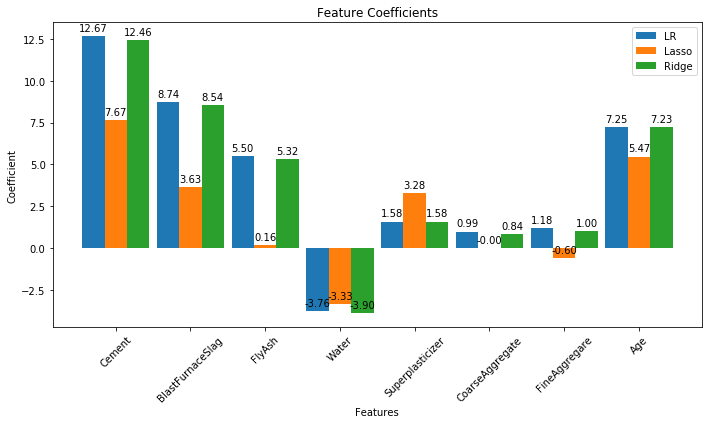

In [31]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

Lasso Regression, reduces the complexity of the model by keeping the coefficients as low as possible. Also, Coefficients with Linear and Ridge are almost same.

##### Plotting predictions

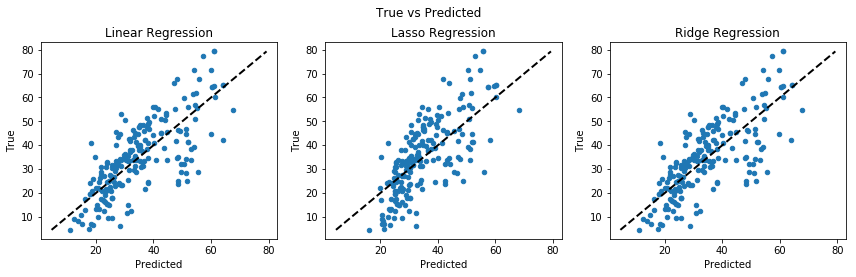

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)


#### 2. Decision Trees

Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 6.78 		 46.00 		4.46 		0.81


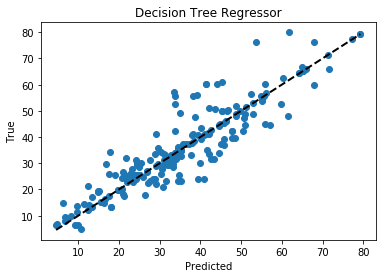

In [33]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

The Root Mean Squared Error (RMSE) has come down from 10.29 to 7.31, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line.

#### 3. Random Forest Regressor

Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.96 		 24.60 		3.44 		0.90


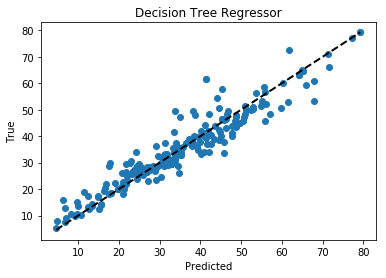

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

The RMSE with Random Forest Regressor is now 5.11, we have reduced the error by ensembling multiple trees.

#### 4. Multi Layer Perceptron

A Multi Layer Perceptron or a Neural Network is capable of learning complex non linear functions mapping input features to target variable, which a linear model like a linear regression cannot do. A Decision tree is still a non linear representation of the data but it can fail to model minute relations between the features and targets. So, the Neural Networks will almost everytime give a better performance compared to the algorithms we have used in this notebook before.

We will use the sklearn MLPRegressor in this case, since the dataset is small there might not be a significant improvment in performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Multi Layer Perceptron 		 4.96 		 24.60 		3.44 		0.90


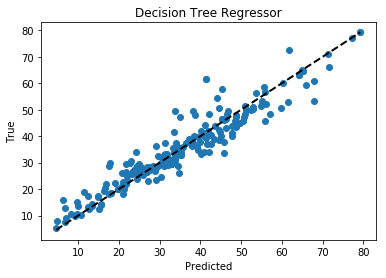

In [36]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000)

mlp.fit(X_train, y_train)

y_pred_mlp = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Multi Layer Perceptron \t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_mlp)),mean_squared_error(y_test, y_pred_mlp),
            mean_absolute_error(y_test, y_pred_mlp), r2_score(y_test, y_pred_mlp)))

plt.scatter(y_test, y_pred_mlp)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

As expected, the performance did not improve.

### Comparision

Finally, lets compare the results of all the algorithms.

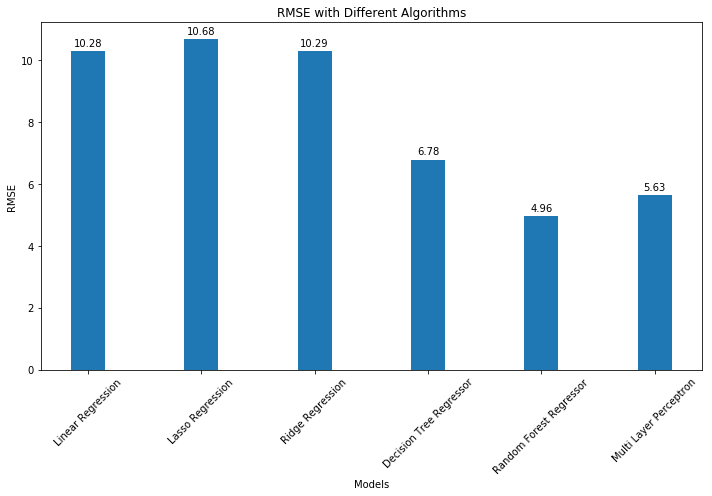

In [37]:
models = [lr, lasso, ridge, dtr, rfr, mlp]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor", "Multi Layer Perceptron"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

### Conclusion
Random Forest Regressor is the best choice for this problem.